[*********************100%%**********************]  1 of 1 completed


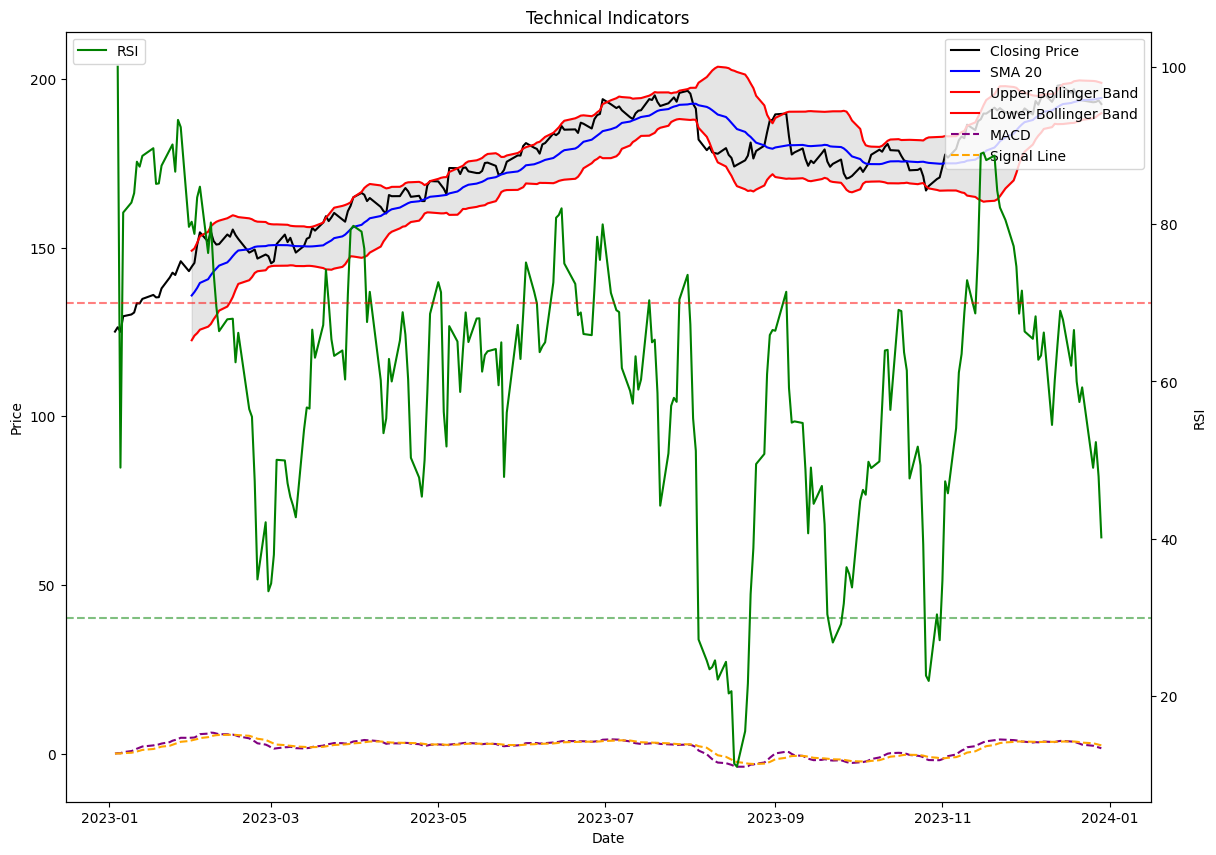

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_sma(data, window):
    data[f'SMA_{window}'] = data['Close'].rolling(window=window).mean()
    return data

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_12'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_26'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_12'] - data['EMA_26']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    data['Histogram'] = data['MACD'] - data['Signal_Line']
    return data

def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    data['Rolling_Mean'] = data['Close'].rolling(window=window).mean()
    data['Rolling_Std'] = data['Close'].rolling(window=window).std()
    data['Bollinger_Upper'] = data['Rolling_Mean'] + (data['Rolling_Std'] * num_std_dev)
    data['Bollinger_Lower'] = data['Rolling_Mean'] - (data['Rolling_Std'] * num_std_dev)
    return data

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

def plot_indicators(data):
    fig, ax1 = plt.subplots(figsize=(14, 10))

    # Plot Closing Price, SMA, and Bollinger Bands
    ax1.plot(data.index, data['Close'], label='Closing Price', color='black')
    ax1.plot(data.index, data['SMA_20'], label='SMA 20', color='blue')
    ax1.plot(data.index, data['Bollinger_Upper'], label='Upper Bollinger Band', color='red')
    ax1.plot(data.index, data['Bollinger_Lower'], label='Lower Bollinger Band', color='red')
    ax1.fill_between(data.index, data['Bollinger_Upper'], data['Bollinger_Lower'], color='gray', alpha=0.2)

    # Plot MACD and Signal Line
    ax1.plot(data.index, data['MACD'], label='MACD', color='purple', linestyle='--')
    ax1.plot(data.index, data['Signal_Line'], label='Signal Line', color='orange', linestyle='--')

    # Plot RSI on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(data.index, data['RSI'], label='RSI', color='green')
    ax2.axhline(70, linestyle='--', alpha=0.5, color='red')
    ax2.axhline(30, linestyle='--', alpha=0.5, color='green')
    ax2.set_ylabel('RSI')
    ax2.legend(loc='upper left')

    ax1.set_title('Technical Indicators')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.legend(loc='upper right')

    plt.show()

# Example usage
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'
sma_window = 20  # Example window size for SMA
macd_short_window = 12
macd_long_window = 26
macd_signal_window = 9
bollinger_window = 20
bollinger_num_std_dev = 2
rsi_window = 14

stock_data = get_stock_data(ticker, start_date, end_date)
stock_data = calculate_sma(stock_data, sma_window)
stock_data = calculate_macd(stock_data, macd_short_window, macd_long_window, macd_signal_window)
stock_data = calculate_bollinger_bands(stock_data, bollinger_window, bollinger_num_std_dev)
stock_data = calculate_rsi(stock_data, rsi_window)
plot_indicators(stock_data)
